In [15]:
# 1. Прогнозирование с помощью линейной регрессии
import numpy as np
from sklearn.linear_model import LinearRegression
#Данные для обучения
X = np.array([[1, 1, 1], [1, 2, 2], [2, 2, 3], [2, 3, 5]])

#Значения функции
y = np.array([9, 14, 18, 26])

#Значение переменных для прогноза функции y_pred
X_pred = np.array([[3, 5, 7]])

#Далее запишите ваш код
lr_model = LinearRegression()
lr_model.fit(X, y)
coeff_ = lr_model.coef_
y_pred = lr_model.predict(X_pred)
answer = np.concatenate([coeff_, y_pred])

In [16]:
# 2. Прогнозирование с помощью логистической регрессии
#Здесь будет выполнена генерация данных для модели
#Данный код будет автоматически выполнен при запуске вашей программы

from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Далее запишите ваш код
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

NameError: name 'train_test_split' is not defined

/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/clus

Text(0, 0.5, 'WCSS')

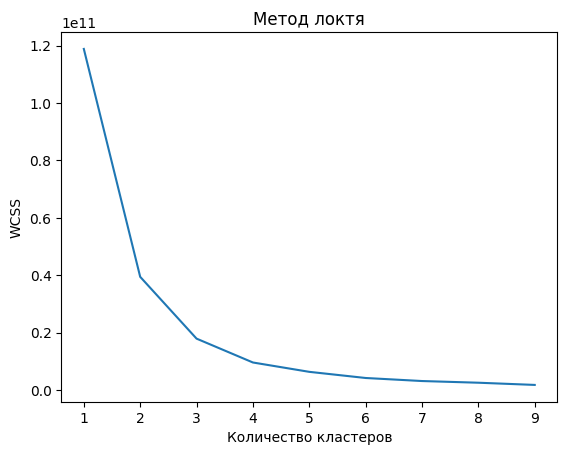

In [17]:
# 4. Определение оптимального числа кластеров методом K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('data/Electric_Car.csv')
X = data[["AccelSec", "TopSpeed_KmH", "Range_Km", "PriceEuro"]]
wcss = []
for clusters in range(1, 10):
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [18]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
cluster_centers_ = np.round(np.linalg.norm(kmeans.cluster_centers_), 3)
cluster_centers_

/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


209833.221

In [19]:
# 4. Определение матрицы рейтингов с использованием SVD
import numpy as np
from scipy.sparse.linalg import svds


ratings = np.array([[3, 1, 0, 1],
               	[0, 3, 0, 1],
               	[1, 2, 0, 5],
               	[1, 0, 0, 2],
               	[0, 1, 3, 1]]).astype(float)

#Далее запишите ваш код
U, S, Vt = svds(ratings, k=2)
S_diag = np.diag(S)
rating_prediction = np.dot(np.dot(U, S_diag), Vt)

In [23]:
# 5. Применение фильтра к изображению
import numpy as np

image = np.array([[1, 2, 1, 1, 3],
              	  [0, 1, 2, 3, 4],
              	  [0, 0, 1, 2, 3],
              	  [3, 2, 1, 5, 0],
              	  [1, 2, 3, 1, 7]])

filter = np.array([[1, 0, 1],
               	  [0, 1, 0],
               	  [1, 0, 1]])


height_a, width_a = image.shape
height_f, width_f = filter.shape

feature_map = np.zeros((height_f, width_f))

for i in range(3):
    for j in range(3):
        # получаем окно размером 3x3, начиная с текущей позиции
        window = image[i: i+3, j: j+3]
        # перемножаем окно с матрицей фильтра
        result = window * filter
        # суммируем результаты умножения, чтобы получить новое значение в выходной матрице C
        feature_map[i, j] = np.sum(result)
